# SpaceX Assignment
---

# Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Collection

In [2]:
data = pd.read_csv("dataset.csv", na_values = "?")

# Data Exploration

In [3]:
data.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
data.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64

In [5]:
#Shape of dataset
print("Number of Features: ", data.shape[1])
print("Number of Instances: ", data.shape[0])

Number of Features:  18
Number of Instances:  90


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [7]:
data.groupby('Class').size()

Class
0    30
1    60
dtype: int64

In [8]:
data.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

## Categorical Features Analysis

In [9]:
cat_data = data.select_dtypes(include= object)
cat_data.head()

,Date,BoosterVersion,Orbit,LaunchSite,Outcome,LandingPad,Serial
0,2010-06-04,Falcon 9,LEO,CCAFS SLC 40,None None,NaN,B0003
1,2012-05-22,Falcon 9,LEO,CCAFS SLC 40,None None,NaN,B0005
2,2013-03-01,Falcon 9,ISS,CCAFS SLC 40,None None,NaN,B0007
3,2013-09-29,Falcon 9,PO,VAFB SLC 4E,False Ocean,NaN,B1003
4,2013-12-03,Falcon 9,GTO,CCAFS SLC 40,None None,NaN,B1004


In [10]:
cat_data.select_dtypes('object').nunique()

Date              90
BoosterVersion     1
Orbit             11
LaunchSite         3
Outcome            8
LandingPad         5
Serial            53
dtype: int64

As we can observe, the date feature has been stored as object data type and later needs to be converted into date type. Also, since the BoosterVersion feature only has one value, we can remove this feature entirely.

In [17]:
for col in cat_data.columns:
        print(col,":")
        print(cat_data[col].value_counts(), "\n")

Date :
2019-05-24    1
2017-03-16    1
2020-01-19    1
2015-02-11    1
2020-01-07    1
             ..
2020-02-17    1
2020-05-30    1
2019-11-11    1
2018-01-08    1
2019-01-11    1
Name: Date, Length: 90, dtype: int64 

BoosterVersion :
Falcon 9    90
Name: BoosterVersion, dtype: int64 

Orbit :
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
SO        1
HEO       1
GEO       1
ES-L1     1
Name: Orbit, dtype: int64 

LaunchSite :
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64 

Outcome :
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
None ASDS       2
False Ocean     2
False RTLS      1
Name: Outcome, dtype: int64 

LandingPad :
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64 

Serial :
B1049    6
B1051    5
B1046    4
B1056    4


From observing the categorical data, we can see that there are only nominal features in this dataset. For nominal features, we can simply use one hot encoding as we do not need to reserve the order unlike ordinal features. For the feature Serial, it has 53 unique value which would drastically increase the size after we apply one hot encoding.

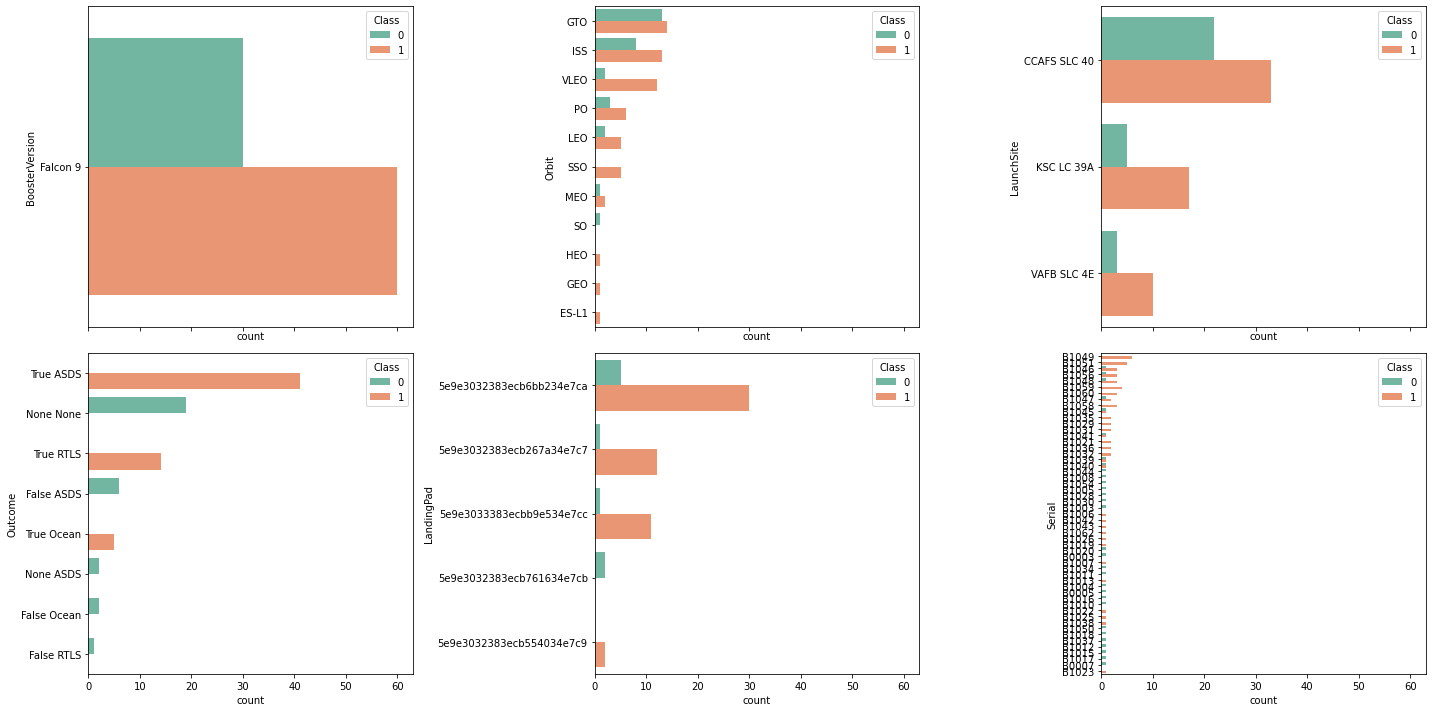

In [45]:
df = cat_data.drop(['Date'], axis=1)

fig, axes =plt.subplots(2,3, figsize=(20,10), sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, df):
    sns.countplot(y=col, hue='Class', data=data, ax=ax, order = df[col].value_counts().index, palette='Set2')

plt.tight_layout()  
plt.show()

From the visualization above, we can observe that most of the features except Serial have quite a good correlation with the output class. Upon taking a closer look at Serial, it is very diverse and many of them hold less amount of decision as compared to other features.

## Numerical Features Analysis

In [11]:
data.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


## Correlation

1. Gives quantifiable relationship between features
2. Corr is calculated using various methods like 'pearson', 'spearman', etc.
3. Corr can be represented using correlation heatmap

In [12]:
data.corr()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
FlightNumber,1.000000,0.596307,0.652842,0.442364,0.635844,0.373619,0.932411,0.735193,0.055256,-0.054194,0.401923
PayloadMass,0.596307,1.000000,0.665218,0.258011,0.468393,0.192318,0.518165,0.612327,0.016181,-0.014655,0.199992
Flights,0.652842,0.665218,1.000000,0.194457,0.782631,0.157727,0.519603,0.684802,0.085228,-0.084547,0.149787
GridFins,0.442364,0.258011,0.194457,1.000000,0.229341,0.902302,0.438023,0.410324,-0.143677,0.144427,0.642540
Reused,0.635844,0.468393,0.782631,0.229341,1.000000,0.155552,0.548036,0.594109,-0.042160,0.042669,0.207582
Legs,0.373619,0.192318,0.157727,0.902302,0.155552,1.000000,0.368994,0.375496,-0.057701,0.058161,0.673825
Block,0.932411,0.518165,0.519603,0.438023,0.548036,0.368994,1.000000,0.743340,-0.030037,0.031621,0.416015
ReusedCount,0.735193,0.612327,0.684802,0.410324,0.594109,0.375496,0.743340,1.000000,-0.101877,0.102668,0.466584
Longitude,0.055256,0.016181,0.085228,-0.143677,-0.042160,-0.057701,-0.030037,-0.101877,1.000000,-0.999966,-0.089519
Latitude,-0.054194,-0.014655,-0.084547,0.144427,0.042669,0.058161,0.031621,0.102668,-0.999966,1.000000,0.090782


Text(0.5, 1.0, '- Correlation matrix and Heatmap -')

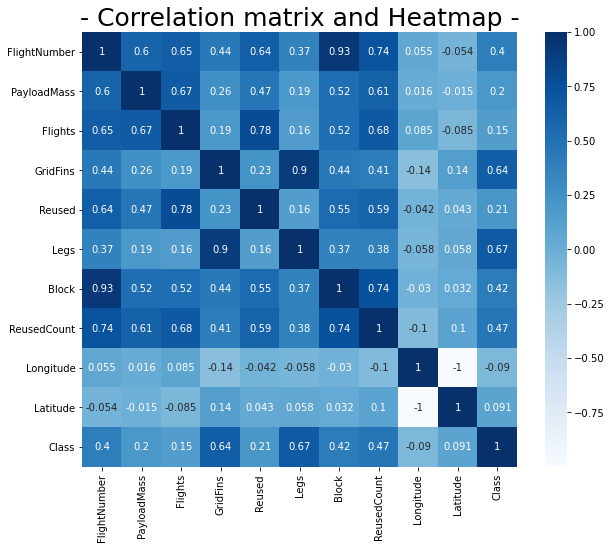

In [13]:
plt.figure(figsize =(10,8))
corrmat = data.corr()
sns.heatmap(corrmat, square=True, annot=True, cbar=True, cmap="Blues");  #Blues
plt.title('- Correlation matrix and Heatmap -',fontsize = 25)

FlightNumber and Block, GridFins and Legs both have strong positive correlation. Hence, we can choose either one feature from each pair and drop it.

---
# Data Visualization

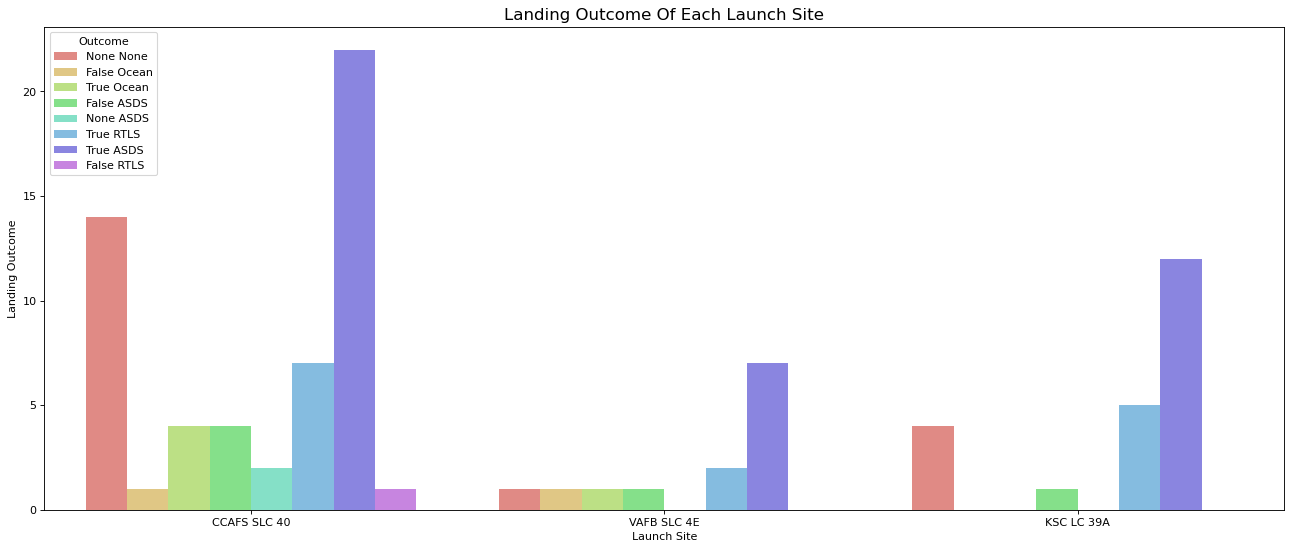

In [14]:
# Visualize the landing outcome of each launch site to know which launch side had the most successful landings 

plt.figure(figsize = (20,8), dpi = 80)
sns.countplot(x = "LaunchSite", data = data, hue = "Outcome", palette = sns.hls_palette(9,l=.7,s=.8));
plt.title("Landing Outcome Of Each Launch Site", fontsize = 15)
plt.xlabel("Launch Site")
plt.ylabel("Landing Outcome")
plt.show()

<Figure size 1600x640 with 0 Axes>

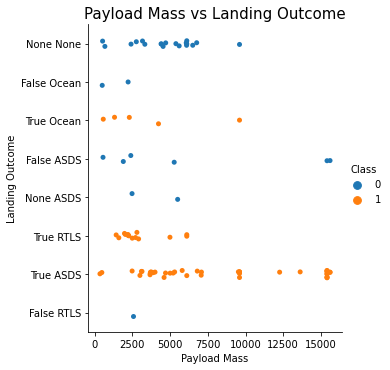

In [15]:
# Visualize the relationship between payload mass and landing outcome

x = data.loc[:,"PayloadMass"]
y = data.loc[:,"Outcome"]

plt.figure(figsize = (20,8), dpi = 80)
# sns.palplot(sns.hls_palette(9,l=.7,s=.8))
# plt.scatter(x,y)
# sns.catplot(x='PayloadMass',y='Orbit',data=data,hue='Class')

sns.catplot(x = 'PayloadMass',y = 'Outcome',data = data,hue = 'Class')

plt.title("Payload Mass vs Landing Outcome", fontsize = 15)
plt.xlabel("Payload Mass")
plt.ylabel("Landing Outcome")
plt.show()